In [22]:
from fastai.tabular import *
from pathlib import Path

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


## Exploring data

In [24]:
path = Path('/kaggle/input/default-of-credit-card-clients-dataset')
working_path = Path('/kaggle/working/')

In [26]:
df = pd.read_csv(path/'UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Setting up variables and data to feed into model

In [27]:
dep_var = 'default.payment.next.month'
cat_names = list(df.select_dtypes(exclude='number').columns)
cont_names = list(df.drop('default.payment.next.month', axis=1).select_dtypes(include='number').columns)
procs = [FillMissing, Categorify, Normalize]

In [64]:
data = (TabularList.from_df(df, path=working_path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct()
                           .label_from_df(cols=dep_var)
                           .databunch())

In [65]:
data.show_batch(rows=10)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0.8863,-0.7505,0.8124,-1.0718,0.8555,0.1644,0.0155,0.1125,0.1385,0.1893,0.2359,0.2542,0.1870,0.2168,0.0218,0.0880,-0.3520,0.0035,-0.2183,-0.1290,-0.2237,-0.2806,0.9919,-0.2902,0
0.8714,-1.1347,0.8124,0.1961,-1.0612,0.8140,0.0155,0.1125,0.1385,0.1893,0.2359,0.2542,-0.5393,-0.5159,-0.4786,-0.4471,-0.4208,-0.3993,-0.2814,-0.1927,-0.2329,-0.2786,-0.2771,-0.2593,0
-0.1019,-0.6736,-1.2309,-1.0718,-1.0612,0.5974,1.7961,1.7843,1.8025,1.8969,1.9957,1.9922,0.3924,0.4763,0.5296,0.6446,0.7239,0.6989,-0.0471,-0.1290,-0.1305,-0.1117,-0.3129,0.3265,1
-0.0858,-0.7505,0.8124,0.1961,0.8555,0.7057,1.7961,1.7843,1.8025,1.8969,1.9957,1.9922,-0.0876,-0.0489,-0.0053,0.0373,0.1400,0.1512,-0.2310,-0.1725,-0.3053,-0.0532,-0.3129,-0.1781,1
0.4979,0.6328,0.8124,-1.0718,0.8555,-0.7018,1.7961,1.7843,1.8025,1.8969,1.9957,1.9922,1.0027,1.0991,1.1371,1.2342,1.4240,1.5045,0.0163,-0.0638,-0.3053,0.0738,-0.0585,-0.0197,1
-1.4043,0.5560,0.8124,0.1961,2.7721,0.3809,0.0155,0.1125,0.1385,0.1893,0.2359,0.2542,1.6443,1.7221,0.3166,0.4213,0.5046,0.5201,0.0987,-0.1290,-0.1305,-0.1501,-0.1172,-0.1501,0
1.2500,-0.6736,0.8124,3.9996,0.8555,-0.2687,-1.7651,-1.5593,-0.6935,0.1893,0.2359,0.2542,-0.6166,-0.6923,-0.4515,-0.5298,-0.4946,-0.6554,-0.3579,0.4245,-0.2179,-0.2221,-0.3129,-0.2902,0
1.4086,0.0180,-1.2309,-1.0718,-1.0612,0.5974,0.0155,0.1125,0.1385,0.1893,0.2359,0.2542,0.2613,0.1070,0.0316,-0.0190,-0.0468,-0.0436,-0.1943,-0.0412,0.2798,0.0126,0.0148,-0.0092,0
0.6908,1.3245,-1.2309,-1.0718,-1.0612,0.3809,0.0155,0.1125,1.8025,1.8969,0.2359,0.2542,1.7168,1.9668,2.1120,2.3332,2.5670,2.8405,0.6631,0.1319,-0.0722,0.1547,0.6787,-0.2902,0
-0.2616,-0.9042,0.8124,0.1961,-1.0612,0.3809,0.0155,0.1125,0.1385,0.1893,0.2359,0.2542,-0.2869,-0.2676,-0.2641,-0.2229,-0.1841,-0.1715,-0.2437,-0.1942,-0.2388,-0.2351,-0.2346,-0.2230,0


## Training model

In [66]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


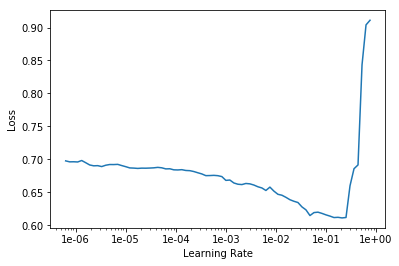

In [67]:
learn.lr_find()
learn.recorder.plot()

## Result

In [68]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.449607,0.435941,0.823833,00:05
1,0.427891,0.427548,0.824333,00:05
2,0.439470,0.424045,0.826000,00:05


## Inference

In [112]:
df.iloc[0]['default.payment.next.month']

1.0

In [110]:
row = df.iloc[0]

In [111]:
learn.predict(row) #55% for 0 and 45% for 1

(Category 0, tensor(0), tensor([0.5465, 0.4535]))

In [114]:
df.iloc[10310]['default.payment.next.month']

0.0

In [115]:
row = df.iloc[10310]

In [116]:
learn.predict(row) #93% for 0, 6% for 1

(Category 0, tensor(0), tensor([0.9326, 0.0674]))